In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("traffic.csv", sep=";")

In [3]:
data

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8"
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1"
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7"
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4"


In [4]:
data["Slowness in traffic (%)"] = data["Slowness in traffic (%)"].str.replace(",",".").astype(float)

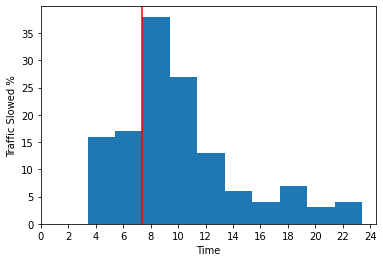

In [7]:
data["Slowness in traffic (%)"].plot.hist()
plt.xlabel("Time")
plt.ylabel("Traffic Slowed %")
plt.xticks(range(0,25,2))
plt.axvline(7.4,color = 'red')
plt.show()

In [6]:
data['Slowness in traffic (%)'].describe()

count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64

In [8]:
data.columns

Index(['Hour (Coded)', 'Immobilized bus', 'Broken Truck', 'Vehicle excess',
       'Accident victim', 'Running over', 'Fire vehicles',
       'Occurrence involving freight', 'Incident involving dangerous freight',
       'Lack of electricity', 'Fire', 'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore', 'Slowness in traffic (%)'],
      dtype='object')

In [9]:
incidents = data.drop(['Hour (Coded)','Slowness in traffic (%)'],axis=1)

In [11]:
incidents.head()

,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
incidents = incidents.sum()

In [14]:
 incidents.index

Index(['Immobilized bus', 'Broken Truck', 'Vehicle excess', 'Accident victim',
       'Running over', 'Fire vehicles', 'Occurrence involving freight',
       'Incident involving dangerous freight', 'Lack of electricity', 'Fire',
       'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore'],
      dtype='object')

In [15]:
incidents.values

array([ 46, 118,   4,  57,  16,   1,   1,   1,  16,   1,  16,   7,  31,
         6,  17,   2])

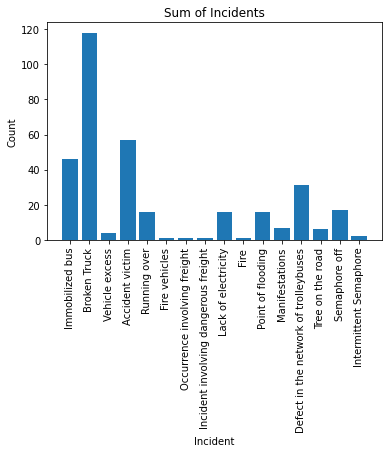

In [16]:
plt.bar(incidents.index, incidents.values)
plt.title("Sum of Incidents")
plt.xlabel("Incident")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [17]:
data.corr()['Slowness in traffic (%)']

Hour (Coded)                             0.729962
Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64

In [18]:
data['Slowness in traffic (%)'].min(),data['Slowness in traffic (%)'].max()

(3.4, 23.4)

In [19]:
above_20 = data[data['Slowness in traffic (%)']>=20]

In [20]:
above_20

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
77,24,0,1,0,0,0,0,0,0,2,0,3,0,0,0,1,0,20.2
78,25,1,3,0,2,0,0,0,0,4,0,1,0,0,0,4,0,22.6
79,26,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,23.4
106,26,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,21.5
107,27,0,3,0,1,0,0,0,0,1,0,7,0,2,0,1,0,22.1


In [24]:
above_20_incidents = above_20.drop(['Hour (Coded)','Slowness in traffic (%)'],axis = 1).sum()

In [25]:
above_20_incidents

Immobilized bus                           2
Broken Truck                              7
Vehicle excess                            0
Accident victim                           3
Running over                              0
Fire vehicles                             0
Occurrence involving freight              0
Incident involving dangerous freight      0
Lack of electricity                      10
Fire                                      0
Point of flooding                        14
Manifestations                            1
Defect in the network of trolleybuses     2
Tree on the road                          0
Semaphore off                             6
Intermittent Semaphore                    0
dtype: int64

In [26]:
above_20.corr()['Slowness in traffic (%)']

Hour (Coded)                             0.549342
Immobilized bus                          0.787608
Broken Truck                             0.079318
Vehicle excess                                NaN
Accident victim                          0.329269
Running over                                  NaN
Fire vehicles                                 NaN
Occurrence involving freight                  NaN
Incident involving dangerous freight          NaN
Lack of electricity                      0.459098
Fire                                          NaN
Point of flooding                       -0.389557
Manifestations                          -0.213329
Defect in the network of trolleybuses    0.064926
Tree on the road                              NaN
Semaphore off                            0.118646
Intermittent Semaphore                        NaN
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64

In [42]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
traffic_per_day = {}
for i in range(5):
    each_day_traffic = data.iloc[i*27:i*27+27]
    traffic_per_day[days[i]] = each_day_traffic
    

In [44]:
traffic_per_day['Wednesday']

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
54,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.4
55,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.8
56,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.3
57,4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5.9
58,5,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,7.0
59,6,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.4
60,7,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.2
61,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.5
62,9,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,6.7
63,10,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7.7


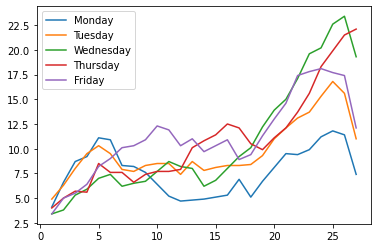

In [45]:
for i in days:
    plt.plot(traffic_per_day[i]['Hour (Coded)'],traffic_per_day[i]['Slowness in traffic (%)'], label = i)
plt.legend()
plt.show()

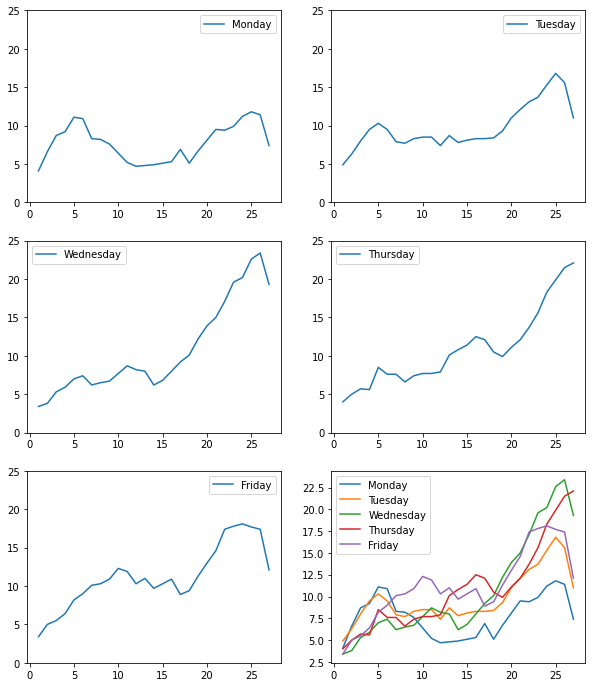

In [48]:
plt.figure(figsize=(10,12))

for i in range(1,6):
    plt.subplot(3,2,i)
    plt.plot(traffic_per_day[days[i-1]]['Hour (Coded)'],traffic_per_day[days[i-1]]['Slowness in traffic (%)'], label = days[i-1])
    plt.legend()
    plt.ylim([0,25])
plt.subplot(3,2,6)
for i in days:
    plt.plot(traffic_per_day[i]['Hour (Coded)'],traffic_per_day[i]['Slowness in traffic (%)'], label = i)
    plt.legend()
plt.plot()
plt.show()